In [132]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
from sklearn import model_selection

In [133]:
def evaluate_model(y_predict, y_test):
    count_ccr = 0
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        if y_predict[i]==y_test[i]:
            count_ccr+=1
        if y_predict[i]==1 and y_test[i]==1:
            TP+=1
        if y_predict[i]==1 and y_test[i]==0:
            FP+=1
        if y_predict[i]==0 and y_test[i]==1:
            FN+=1
    ccr = count_ccr/len(y_test)
    if (TP+FP)==0:
        print('All the prediction is normal')
        preci = 0
    else:
        preci = TP/(TP+FP)
    recall= TP/(TP+FN)
    #print('For this model, the CCR is', ccr, ', the Precision is', preci, 'and the Recall is', recall )
    return ccr,preci,recall

In [134]:
data = pd.read_csv("dataset/attack1with7FeatureVector.csv")
data = data.dropna(axis=0, how="any")#remove invalid data

In [135]:
X = data.iloc[:,[2,3,6,7,8,9,12,13,14,15,16,17,18]]
y = data.iloc[:,11]

In [136]:
from itertools import chain
list_ccr_1    =[]
list_recall_1 =[]
list_preci_1  =[]

list_ccr_2    =[]
list_recall_2 =[]
list_preci_2  =[]
for i in range(10):
    X = data.iloc[:,[2,3,6,7,8,9,12,13,14,15,16,17,18]]
    y = data.iloc[:,11]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )
    
    
    model_no_feature = Sequential()
    model_no_feature.add(Dense(64, input_dim=6, activation='sigmoid'))
    model_no_feature.add(Dense(16, activation='sigmoid'))
    model_no_feature.add(Dense(1, activation='sigmoid'))
    model_no_feature.compile(loss='mean_absolute_error', optimizer='RMSprop', metrics=['binary_accuracy'])    
    model_no_feature.fit(X_train.iloc[:,:6], y_train, epochs=8,batch_size=100,verbose=0)
    y_predict = np.round(model_no_feature.predict(X_test.iloc[:,:6]))
    y_predict =np.reshape(y_predict, (y_predict.shape[0],  1))
    ccr_no_feature,preci_no_feature,recall_no_feature = evaluate_model(y_predict, y_test.values)
    
    model_feature = Sequential()
    model_feature.add(Dense(64, input_dim=7, activation='sigmoid'))
    model_feature.add(Dense(16, activation='sigmoid'))
    model_feature.add(Dense(1, activation='sigmoid'))
    model_feature.compile(loss='mean_absolute_error', optimizer='RMSprop', metrics=['binary_accuracy'])
    model_feature.fit(X_train.iloc[:,6:], y_train, epochs=8,batch_size=100,verbose=0)
    y_predict = np.round(model_feature.predict(X_test.iloc[:,6:]))
    ccr_feature,preci_feature,recall_feature = evaluate_model(y_predict, y_test.values)
    
    list_ccr_1.append(ccr_no_feature)
    list_recall_1.append(recall_no_feature)
    list_preci_1.append(preci_no_feature)
    
    list_ccr_2.append(ccr_feature)
    list_preci_2.append(preci_feature)
    list_recall_2.append(recall_feature)


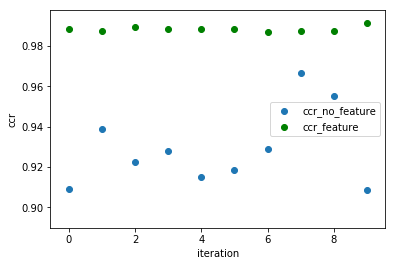

In [137]:

plt.scatter(range(10),list_ccr_1,label = 'ccr_no_feature')
plt.scatter(range(10),list_ccr_2,label = 'ccr_feature',c='g')
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("ccr")
plt.show()


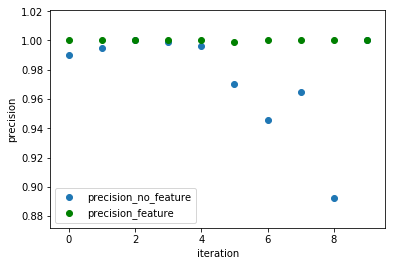

In [138]:

plt.scatter(range(10),list_preci_1,label = 'precision_no_feature')
plt.scatter(range(10),list_preci_2,label = 'precision_feature',c='g')
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("precision")
plt.show()


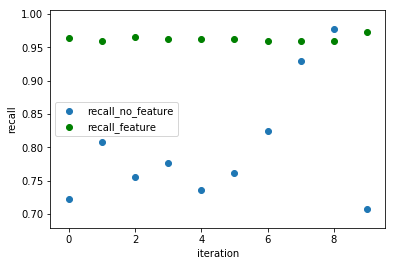

In [139]:
plt.scatter(range(10),list_recall_1,label = 'recall_no_feature')
plt.scatter(range(10),list_recall_2,label = 'recall_feature',c='g')
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("recall")
plt.show()

In [140]:
print('ccr_no_feature : ',np.average(list_ccr_1))
print('ccr_feature : '   ,np.average(list_ccr_2))
print('precision_no_feature : ',np.average(list_preci_1))
print('precision_no_feature : ',np.average(list_preci_2))
print('recall_no_feature : ',np.average(list_recall_1))
print('recall_no_feature : ',np.average(list_recall_2))

ccr_no_feature :  0.9290944753187315
ccr_feature :  0.9882804838182413
precision_no_feature :  0.9753833197287257
precision_no_feature :  0.9998911268372346
recall_no_feature :  0.7997980936893675
recall_no_feature :  0.9631598066451563
